# Libraries Imported

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

np.random.seed(42)
random.seed(42)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Data Loading and Data Understanding

In [2]:
df = pd.read_csv('listings2.csv')

In [3]:
#Removing '$' from price column.
df['price'] = df.price.str.lstrip('$').str.replace(',', '').astype('float')

# Exploratory Data Analysis (EDA)

# To visualize that where to invest in a property in HongKong to get the maximum number of returns from Airbnb.

Neighbourhood and Average Price comparison.

In [4]:
print(df['neighbourhood_cleansed'])

0       Central & Western
1       Central & Western
2       Central & Western
3       Central & Western
4       Central & Western
              ...        
6079             Wan Chai
6080        Yau Tsim Mong
6081             Wan Chai
6082             Wan Chai
6083             Sai Kung
Name: neighbourhood_cleansed, Length: 6084, dtype: object


In [5]:
price_per_neighbourhood = df.groupby('neighbourhood_cleansed').price.mean()

In [6]:
price_per_neighbourhood

neighbourhood_cleansed
Central & Western     781.228662
Eastern               561.807692
Islands              1212.377622
Kowloon City          940.268595
Kwai Tsing            909.800000
Kwun Tong             577.714286
North                 799.207207
Sai Kung             2436.571429
Sha Tin               593.050000
Sham Shui Po          672.229630
Southern             1374.454545
Tai Po                820.826087
Tsuen Wan            5142.650000
Tuen Mun             2154.371429
Wan Chai              553.724894
Wong Tai Sin          500.833333
Yau Tsim Mong         812.516883
Yuen Long             548.121212
Name: price, dtype: float64

Text(0.5, 1.0, 'Neighbourhood vs Average Price Chart')

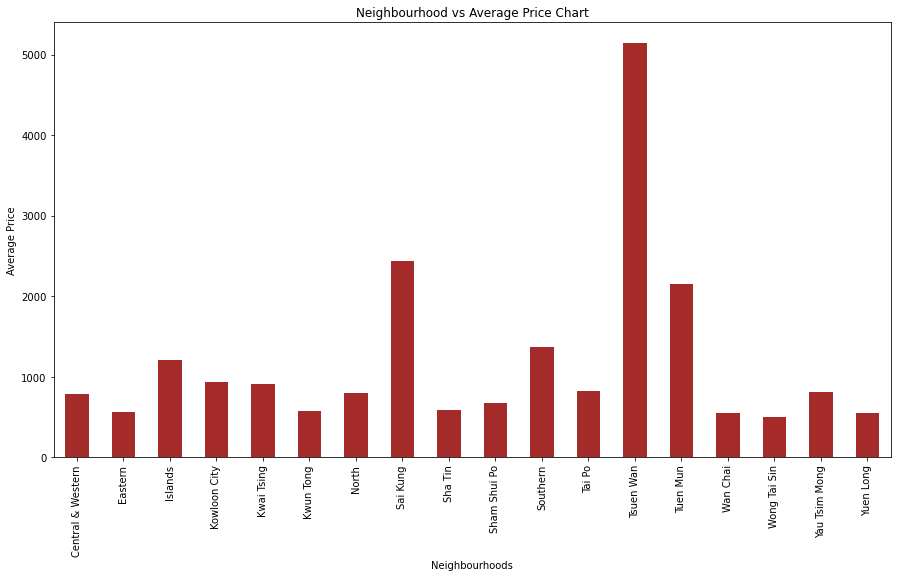

In [7]:
plt.figure(figsize=(15,8))
price_per_neighbourhood.plot(kind='bar', color='brown')
plt.xlabel('Neighbourhoods')
plt.ylabel('Average Price')
plt.title('Neighbourhood vs Average Price Chart')

Room Type and Average Price comparison.

In [8]:
print(df['room_type'])

0       Entire home/apt
1       Entire home/apt
2       Entire home/apt
3       Entire home/apt
4       Entire home/apt
             ...       
6079       Private room
6080       Private room
6081       Private room
6082    Entire home/apt
6083    Entire home/apt
Name: room_type, Length: 6084, dtype: object


In [9]:
price_per_room_type = df.groupby('room_type').price.mean()

In [10]:
price_per_room_type

room_type
Entire home/apt    1080.944609
Hotel room          606.100000
Private room        600.920208
Shared room         723.560345
Name: price, dtype: float64

Text(0.5, 1.0, 'Room Type vs Average Price Chart')

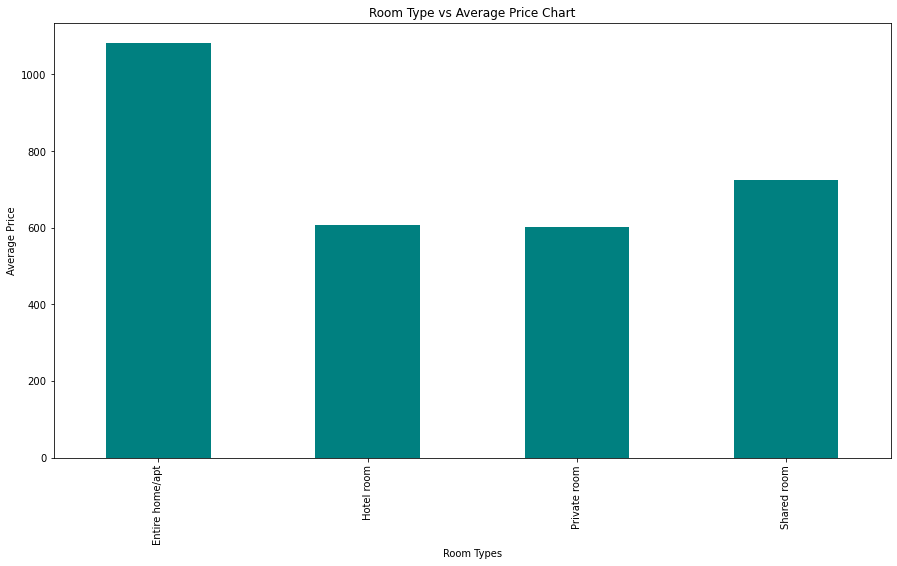

In [11]:
plt.figure(figsize=(15,8))
price_per_room_type.plot(kind='bar', color='teal')
plt.xlabel('Room Types')
plt.ylabel('Average Price')
plt.title('Room Type vs Average Price Chart')

Property Type and Average Price comparison.

In [12]:
print(df['property_type'])

0                Entire rental unit
1                Entire rental unit
2                Entire rental unit
3                Entire rental unit
4                Entire rental unit
                   ...             
6079    Private room in rental unit
6080    Private room in guest suite
6081    Private room in rental unit
6082     Entire condominium (condo)
6083                   Entire villa
Name: property_type, Length: 6084, dtype: object


In [13]:
price_per_property_type = df.groupby('property_type').price.mean()

In [14]:
price_per_property_type

property_type
Boat                                 6793.000000
Campsite                              484.500000
Castle                               1380.000000
Cave                                 1249.000000
Earth house                           288.000000
                                        ...     
Shared room in serviced apartment     152.200000
Shared room in tiny house            2850.000000
Shared room in townhouse              389.000000
Tent                                  140.333333
Tiny house                            640.500000
Name: price, Length: 70, dtype: float64

Text(0.5, 1.0, 'Property vs Average Price Chart')

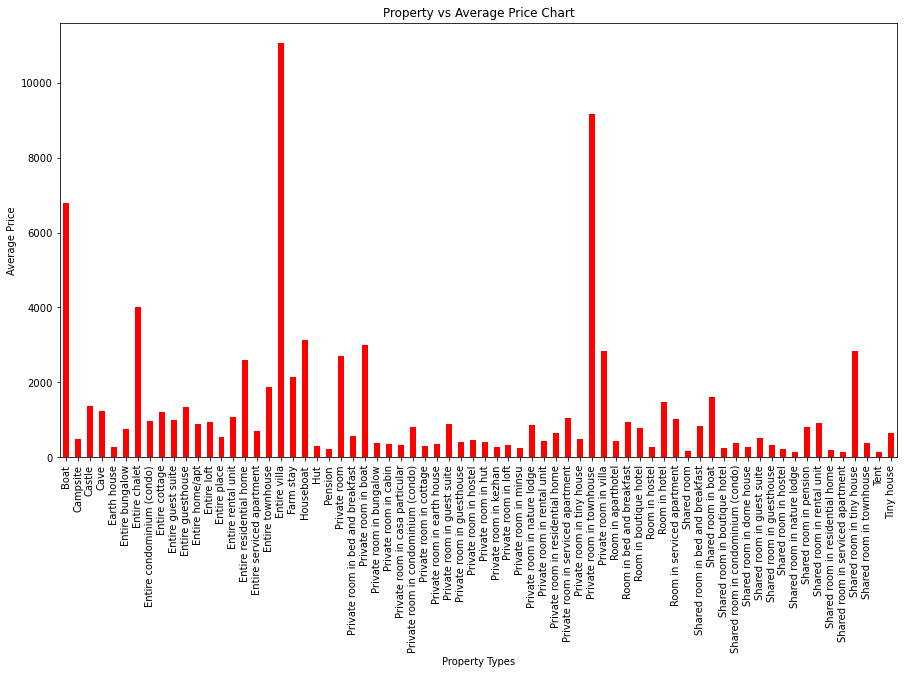

In [15]:
plt.figure(figsize=(15,8))
price_per_property_type.plot(kind='bar', color='red')
plt.xlabel('Property Types')
plt.ylabel('Average Price')
plt.title('Property vs Average Price Chart')

# To visualize that which Room Type is most and least expensive and come under which Property Type and Neighbourhood of HongKong.


Visualization of Room Type Distributions.

In [16]:
room_type_count = df.room_type.value_counts()

In [17]:
room_type_count

Private room       3271
Entire home/apt    2365
Shared room         348
Hotel room          100
Name: room_type, dtype: int64

<AxesSubplot:title={'center':'Room Type Distribution'}, ylabel='room_type'>

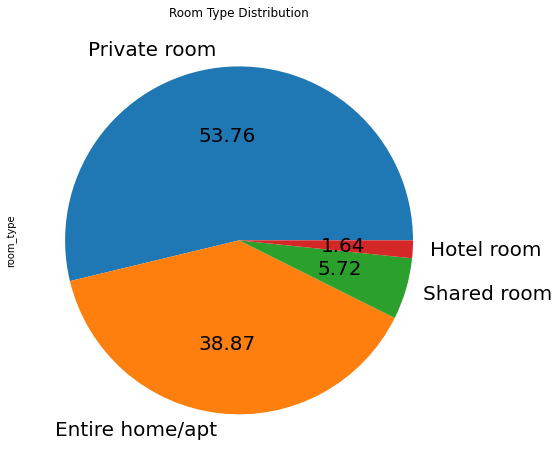

In [18]:
#Pie Chart.
room_type_count.plot.pie(figsize=(8, 8), fontsize = 20, autopct = '%.2f', title = 'Room Type Distribution')

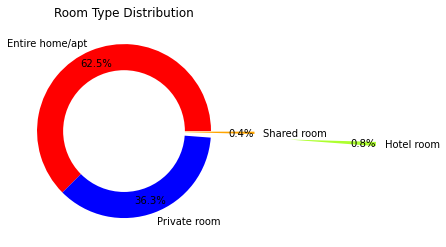

In [19]:
#Donut Chart.
room_type_labels = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']
room_type_counts_labels = [2030, 1180, 25, 14]

colors = ['#FF0000', '#0000FF', '#ADFF2F', '#FFA500']
explode = (0, 0, 1.9, 0.5)
plt.pie(room_type_counts_labels, colors=colors, labels= room_type_labels, autopct='%1.1f%%', pctdistance=0.85, explode=explode)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Room Type Distribution')
plt.show()

Property Type and Room Type compared with Price.

In [20]:
df.property_type.unique()

array(['Entire rental unit', 'Private room in rental unit',
       'Entire condominium (condo)', 'Shared room in rental unit',
       'Room in bed and breakfast', 'Room in hostel',
       'Private room in hostel', 'Campsite', 'Entire residential home',
       'Room in aparthotel', 'Private room in residential home',
       'Entire serviced apartment', 'Private room in townhouse',
       'Private room in bed and breakfast', 'Room in boutique hotel',
       'Shared room', 'Private room', 'Shared room in hostel',
       'Shared room in bed and breakfast', 'Entire guest suite',
       'Private room in condominium (condo)', 'Entire bungalow',
       'Tiny house', 'Room in hotel', 'Shared room in guesthouse', 'Cave',
       'Private room in serviced apartment', 'Private room in guesthouse',
       'Private room in guest suite', 'Shared room in pension',
       'Shared room in residential home', 'Farm stay', 'Earth house',
       'Private room in loft', 'Entire cottage',
       'Private room 

In [21]:
df = df[df.property_type != 0]

In [22]:
property_type_count = df.property_type.value_counts()

In [23]:
property_type_count

Private room in rental unit    2169
Entire rental unit             1365
Entire condominium (condo)      430
Entire serviced apartment       349
Shared room in rental unit      234
                               ... 
Private room in cabin             1
Earth house                       1
Private room in boat              1
Hut                               1
Shared room in pension            1
Name: property_type, Length: 70, dtype: int64

Text(0, 0.5, 'Number of listings')

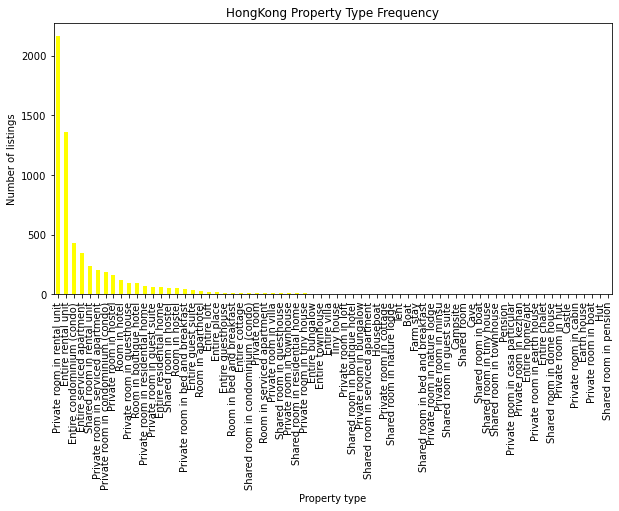

In [24]:
property_type_count.plot.bar(color = 'yellow', figsize =(10,5), title = 'HongKong Property Type Frequency')
plt.xlabel('Property type')
plt.ylabel('Number of listings')

In [25]:
prices_data = df.groupby(['property_type','room_type']).price.mean()

In [26]:
prices_data

property_type                      room_type      
Boat                               Entire home/apt    6793.000000
Campsite                           Entire home/apt     484.500000
Castle                             Entire home/apt    1380.000000
Cave                               Entire home/apt    1249.000000
Earth house                        Entire home/apt     288.000000
                                                         ...     
Shared room in serviced apartment  Shared room         152.200000
Shared room in tiny house          Shared room        2850.000000
Shared room in townhouse           Shared room         389.000000
Tent                               Entire home/apt     140.333333
Tiny house                         Entire home/apt     640.500000
Name: price, Length: 75, dtype: float64

Text(0.5, 1.0, 'Heatmap between Property Type and Room Type')

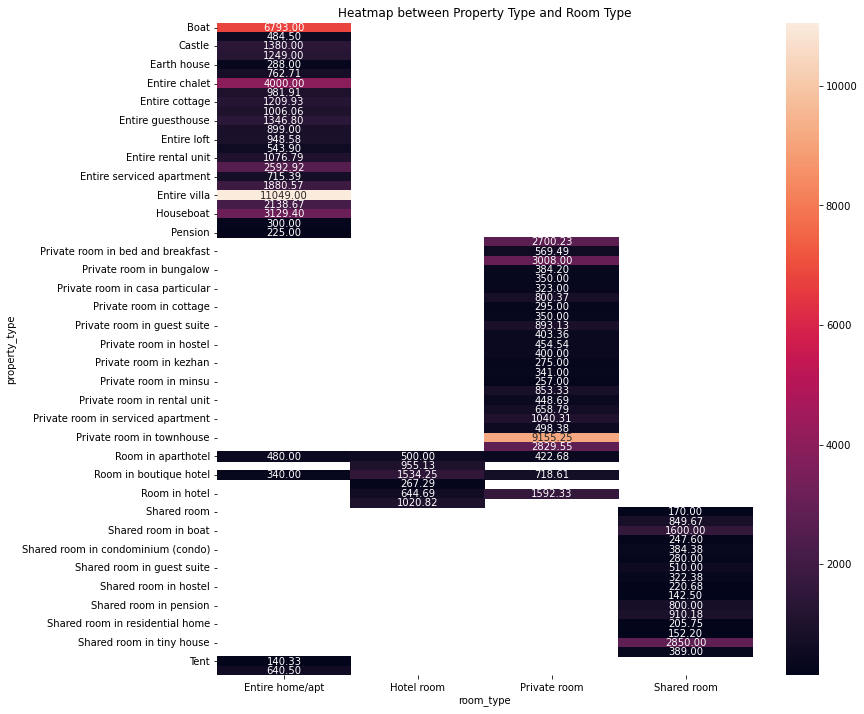

In [27]:
plt.figure(figsize=(12,12))
sns.heatmap(df.groupby(['property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".2f")
plt.title('Heatmap between Property Type and Room Type')

Neighbourhood Cleansed and Room Type compared with Price.

In [28]:
df.groupby(['neighbourhood_cleansed','room_type']).price.mean()

neighbourhood_cleansed  room_type      
Central & Western       Entire home/apt    1125.266940
                        Hotel room         2043.500000
                        Private room        376.084507
                        Shared room         696.933333
Eastern                 Entire home/apt     930.320388
                        Private room        280.322314
                        Shared room         172.100000
Islands                 Entire home/apt    1348.754717
                        Hotel room         1166.750000
                        Private room        803.434783
                        Shared room         700.000000
Kowloon City            Entire home/apt     915.848837
                        Hotel room          762.000000
                        Private room       1034.908397
                        Shared room         518.625000
Kwai Tsing              Entire home/apt    1014.000000
                        Private room        493.000000
Kwun Tong               E

Text(0.5, 1.0, 'Heatmap between Neighbourhood Cleansed and Room Type')

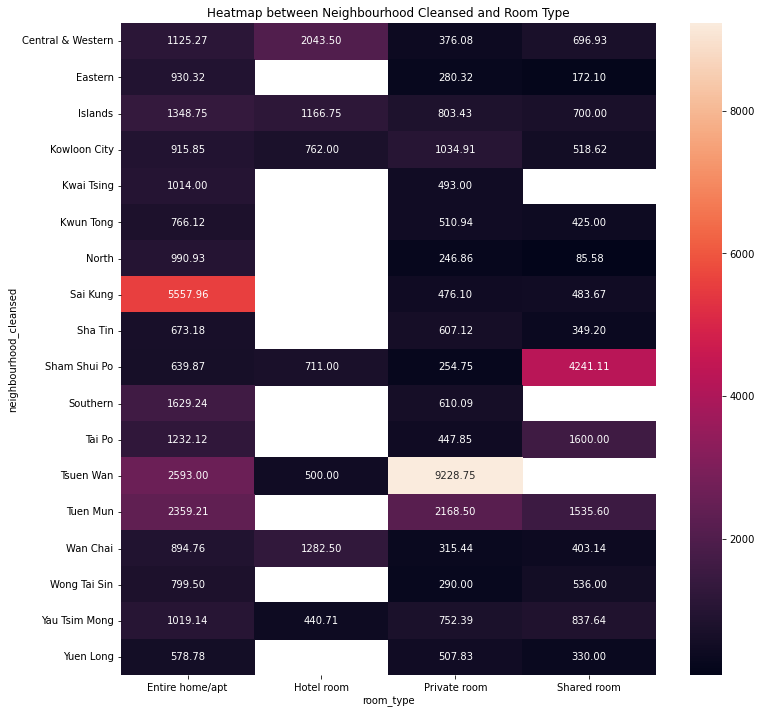

In [29]:
plt.figure(figsize=(12,12));
sns.heatmap(df.groupby(['neighbourhood_cleansed', 'room_type']).price.mean().unstack(),annot=True, fmt=".2f")
plt.title('Heatmap between Neighbourhood Cleansed and Room Type')

# To visualize that which listing id has good and bad Review Score Ratings on the basis of Neighbourhood, Property Type, Room Type and Bedrooms available in the individuals.


In [30]:
df.review_scores_rating.unique()

array([4.76, 4.84, 4.44, 4.67, 4.49, 4.28, 4.32, 4.89, 4.59, 4.39, 4.27,
       5.  , 4.13, 4.  , 4.71, 4.43, 4.53, 4.11, 4.46, 4.5 , 4.77, 4.74,
       4.88, 4.51, 3.5 , 4.83, 4.22, 4.37, 4.31, 4.47, 4.7 , 4.21, 4.75,
       4.72,  nan, 4.42, 4.48, 4.34, 0.  , 4.8 , 4.57, 4.6 , 4.81, 4.61,
       2.  , 4.65, 4.55, 4.62, 4.06, 4.58, 3.4 , 4.33, 4.79, 4.69, 4.1 ,
       4.52, 4.82, 3.13, 4.68, 4.63, 4.25, 4.36, 4.45, 4.54, 4.86, 4.35,
       4.9 , 4.14, 4.56, 4.66, 4.92, 3.  , 4.2 , 4.38, 4.4 , 4.94, 4.85,
       4.26, 4.87, 4.78, 4.73, 4.17, 4.15, 4.19, 4.18, 4.64, 3.78, 4.12,
       1.  , 4.41, 3.96, 3.86, 4.04, 3.8 , 4.08, 4.29, 4.97, 4.95, 3.93,
       4.07, 4.98, 4.16, 3.25, 4.93, 4.91, 4.96, 3.88, 4.23, 3.67, 2.83,
       4.3 , 3.98, 4.09, 3.94, 3.57, 4.02, 4.24, 3.75, 3.83, 4.03, 3.43,
       3.33, 2.5 , 3.7 , 3.6 , 4.05, 4.99, 3.79, 3.38, 3.17, 3.2 , 3.92,
       2.67, 3.9 , 3.62, 2.25, 1.5 ])

In [31]:
df[['review_scores_rating']] = df[['review_scores_rating']].fillna(value=0)

Review Scores Rating validate with Neighbourhood Cleansed.

In [32]:
ratings_per_neighbourhood = df.groupby(['neighbourhood_cleansed', 'property_type']).review_scores_rating.mean()

In [33]:
ratings_per_neighbourhood.sort_values(ascending=False)

neighbourhood_cleansed  property_type              
Sham Shui Po            Entire townhouse               5.0
Tai Po                  Private room in townhouse      5.0
Kwai Tsing              Cave                           5.0
North                   Room in boutique hotel         5.0
Kowloon City            Private room in tiny house     5.0
                                                      ... 
Southern                Entire place                   0.0
Sham Shui Po            Shared room in hostel          0.0
                        Private room in guest suite    0.0
Sha Tin                 Entire place                   0.0
Yuen Long               Shared room in townhouse       0.0
Name: review_scores_rating, Length: 313, dtype: float64

Text(0.5, 1.0, 'Reviews based on neighbourhood and price')

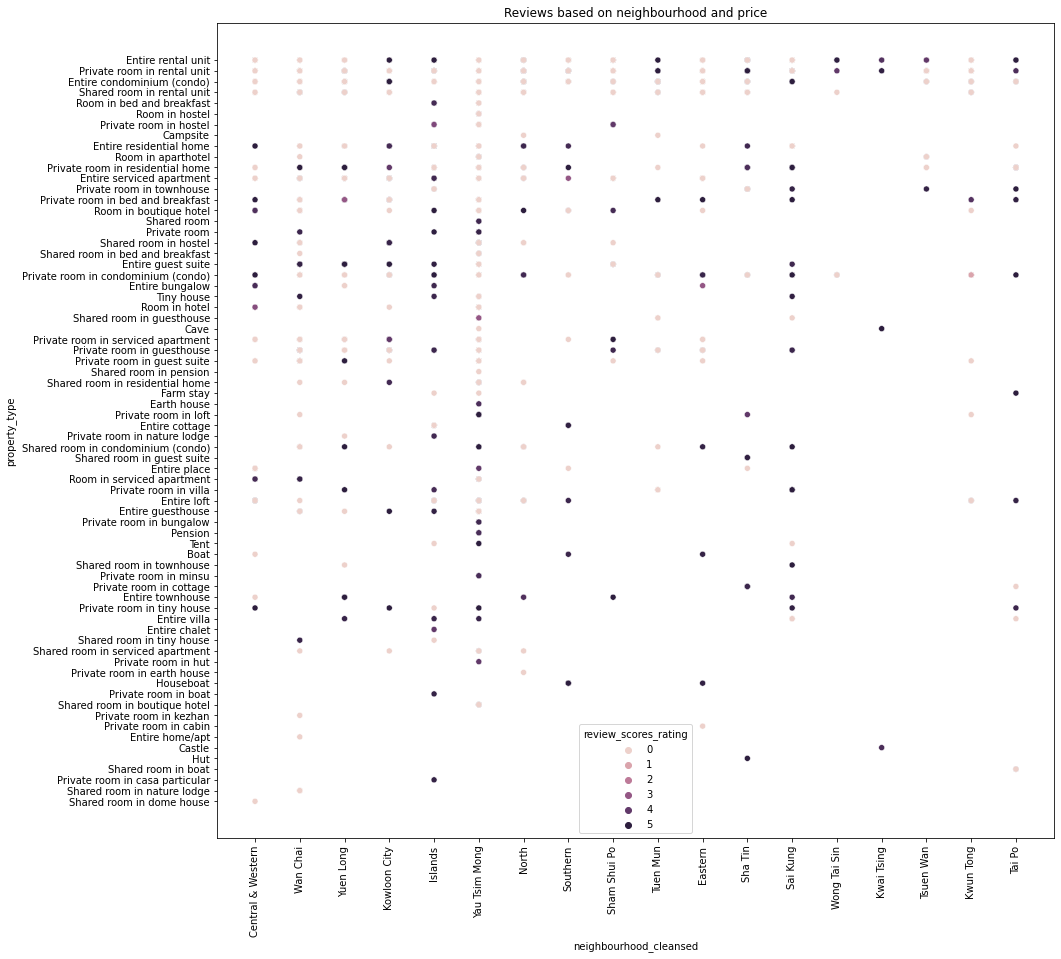

In [34]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x='neighbourhood_cleansed', y='property_type', hue='review_scores_rating', data=df)
plt.xticks(rotation=90)
plt.title('Reviews based on neighbourhood and price')

Review Scores Rating validate with Property Type.

In [35]:
ratings_per_property_type = df.groupby('property_type').review_scores_rating.mean()

In [36]:
ratings_per_property_type

property_type
Boat                                 3.176667
Campsite                             0.000000
Castle                               4.400000
Cave                                 2.500000
Earth house                          4.350000
                                       ...   
Shared room in serviced apartment    1.000000
Shared room in tiny house            2.380000
Shared room in townhouse             2.500000
Tent                                 1.666667
Tiny house                           3.118333
Name: review_scores_rating, Length: 70, dtype: float64

Text(0.5, 1.0, 'Property Type vs Average Rating Chart')

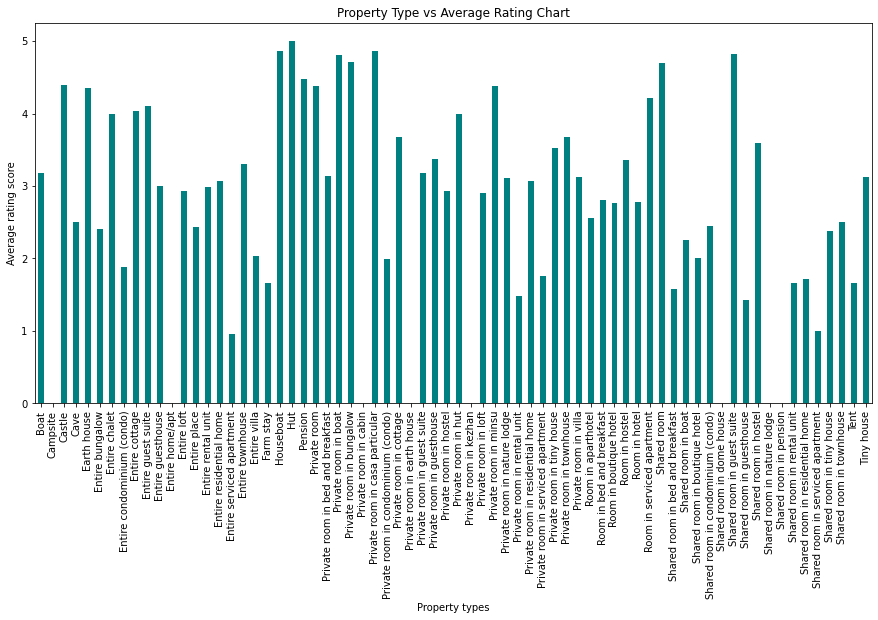

In [37]:
ratings_per_property_type.plot(kind='bar',color='teal', figsize=(15,7))
plt.xlabel('Property types')
plt.ylabel('Average rating score')
plt.title('Property Type vs Average Rating Chart')

Review Scores Rating validate Room Type and Bedrooms.

In [38]:
ratings_per_bedrooms = df.groupby(['room_type', 'bedrooms']).review_scores_rating.mean()

In [39]:
ratings_per_bedrooms

room_type        bedrooms
Entire home/apt  1.0         2.356607
                 2.0         2.936210
                 3.0         3.302435
                 4.0         3.854600
                 5.0         4.221250
                 6.0         5.000000
                 7.0         4.570000
                 8.0         0.000000
                 10.0        0.000000
Hotel room       1.0         3.639647
                 2.0         3.380000
                 3.0         0.000000
Private room     1.0         1.878209
                 2.0         2.452727
                 3.0         1.551000
                 4.0         3.398667
                 5.0         2.431818
                 6.0         2.292500
                 7.0         0.333333
                 8.0         0.000000
                 9.0         1.200000
                 10.0        1.000000
                 11.0        0.500000
Shared room      1.0         2.012775
Name: review_scores_rating, dtype: float64

Text(0.5, 1.0, 'Room_type, Bedrooms vs Average Rating Chart')

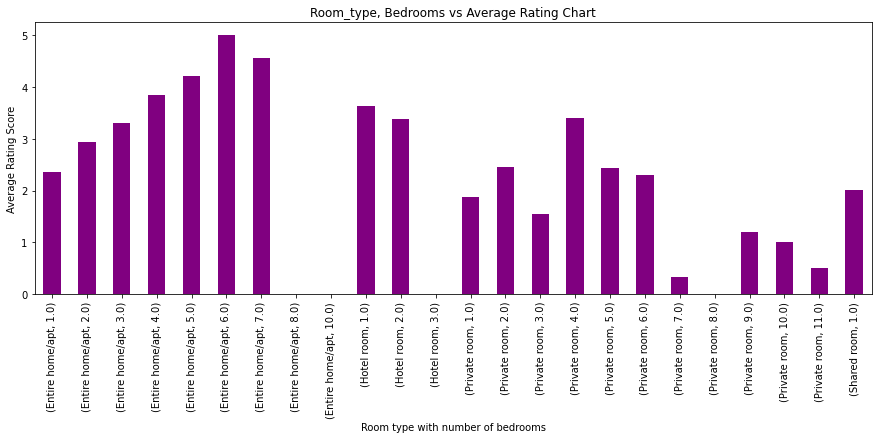

In [40]:
plt.figure(figsize=(15, 5))
ratings_per_bedrooms.plot(kind='bar',color='purple')
plt.xlabel('Room type with number of bedrooms')
plt.ylabel('Average Rating Score')
plt.title('Room_type, Bedrooms vs Average Rating Chart')

# Data Pre-Processing

# Data Cleaning, Feature Engineering, Data Reduction, Data Transformation and EDA

# To predict and validate the price using different algorithms.

In [41]:
df.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17891,https://www.airbnb.com/rooms/17891,20211022234759,2021-10-23,Large Light Filled Loft,"Gorgeous and spacious loft, in the best locati...",Best neighborhood in Hong Kong! A mix of old a...,https://a0.muscache.com/pictures/119686/6ced58...,69063,https://www.airbnb.com/users/show/69063,...,4.93,4.90,4.66,NaN,f,1,1,0,0,1.07
1,69074,https://www.airbnb.com/rooms/69074,20211022234759,2021-10-23,Beautiful oasis of plants & art @ best location,An ideal Hong location any visitor--hip withou...,"In the upper part of trendy, hip Sheung Wan, w...",https://a0.muscache.com/pictures/84364564/1e0c...,160139,https://www.airbnb.com/users/show/160139,...,4.91,4.90,4.69,NaN,f,1,1,0,0,1.19
2,103760,https://www.airbnb.com/rooms/103760,20211022234759,2021-10-23,Central Centre 5 min walk to/from Central MTR,"Located right in the heart of Central, this 2 ...",NaN,https://a0.muscache.com/pictures/815221/056993...,304876,https://www.airbnb.com/users/show/304876,...,4.60,4.72,4.40,NaN,f,9,5,4,0,3.05
3,104626,https://www.airbnb.com/rooms/104626,20211022234759,2021-10-23,Entire Flat - Next to Man Mo Temple,<b>The space</b><br />Situated in one of Hong ...,NaN,https://a0.muscache.com/pictures/1947265/ef01a...,544166,https://www.airbnb.com/users/show/544166,...,4.93,4.79,4.71,NaN,f,1,1,0,0,0.12
4,132773,https://www.airbnb.com/rooms/132773,20211022234759,2021-10-23,Fabulous 2 Bdrm Aprt Open kitchen,"Nicely decorated, spacious 2 bedroom apartment...",The Sheung Wan neighbourhood is ever changing ...,https://a0.muscache.com/pictures/36936441/e4c1...,304876,https://www.airbnb.com/users/show/304876,...,4.64,4.40,4.38,NaN,f,9,5,4,0,2.45


In [42]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [43]:
df.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               1
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3108
Length: 74, dtype: int64

In [44]:
df.isnull().sum().sum()

67658

In [45]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.084000e+03,6.084000e+03,6.084000e+03,6084.000000,6084.000000,0.0,6084.000000,6084.000000,6084.000000,0.0,...,2913.000000,2912.000000,2913.000000,2913.000000,0.0,6084.000000,6084.000000,6084.000000,6084.000000,2976.000000
mean,2.978912e+07,2.021102e+13,1.067365e+08,106.324786,106.324786,NaN,22.303696,114.160916,2.690828,NaN,...,4.678816,4.688863,4.734174,4.479437,NaN,101.504931,19.130671,75.179816,7.017751,0.851095
std,1.354203e+07,0.000000e+00,1.060592e+08,147.697196,147.697196,NaN,0.050116,0.048094,2.350492,NaN,...,0.610420,0.596353,0.499815,0.647922,NaN,143.290668,38.389164,126.281514,15.886165,1.304591
min,1.789100e+04,2.021102e+13,6.906300e+04,0.000000,0.000000,NaN,22.159720,113.856530,0.000000,NaN,...,0.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.001046e+07,2.021102e+13,1.556724e+07,3.000000,3.000000,NaN,22.281000,114.156127,2.000000,NaN,...,4.660000,4.670000,4.680000,4.360000,NaN,3.000000,0.000000,0.000000,0.000000,0.100000
50%,3.206775e+07,2.021102e+13,6.770988e+07,13.000000,13.000000,NaN,22.296185,114.171555,2.000000,NaN,...,4.860000,4.880000,4.880000,4.640000,NaN,11.000000,2.000000,4.000000,0.000000,0.360000
75%,3.953896e+07,2.021102e+13,1.588429e+08,230.000000,230.000000,NaN,22.312795,114.180740,3.000000,NaN,...,5.000000,5.000000,5.000000,4.840000,NaN,186.000000,17.000000,49.000000,4.250000,1.060000
max,5.292965e+07,2.021102e+13,4.262934e+08,476.000000,476.000000,NaN,22.559380,114.361400,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,384.000000,155.000000,363.000000,64.000000,25.330000


In [46]:
df = df.drop(columns=['listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'bathrooms',
       'bathrooms_text', 'beds', 'amenities',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'])

In [47]:
df

,id,latitude,longitude,room_type,accommodates,bedrooms,price,number_of_reviews
0,17891,22.283270,114.149880,Entire home/apt,3,NaN,1400.0,73
1,69074,22.283500,114.148540,Entire home/apt,3,1.0,1497.0,135
2,103760,22.284180,114.154310,Entire home/apt,6,2.0,614.0,274
3,104626,22.283600,114.147900,Entire home/apt,2,1.0,2533.0,14
4,132773,22.289210,114.143250,Entire home/apt,6,2.0,847.0,209
...,...,...,...,...,...,...,...,...
6079,52909143,22.280871,114.184678,Private room,2,NaN,270.0,0
6080,52909688,22.298899,114.172201,Private room,1,1.0,62.0,0
6081,52909988,22.279056,114.184477,Private room,2,NaN,270.0,0
6082,52925818,22.267564,114.181842,Entire home/apt,2,2.0,5000.0,0


In [48]:
df.isnull().sum()

id                      0
latitude                0
longitude               0
room_type               0
accommodates            0
bedrooms             1219
price                   0
number_of_reviews       0
dtype: int64

In [49]:
df.isnull().sum().sum()

1219

In [50]:
df[['bedrooms']] = df[['bedrooms']].fillna(value=0)

In [51]:
df

,id,latitude,longitude,room_type,accommodates,bedrooms,price,number_of_reviews
0,17891,22.283270,114.149880,Entire home/apt,3,0.0,1400.0,73
1,69074,22.283500,114.148540,Entire home/apt,3,1.0,1497.0,135
2,103760,22.284180,114.154310,Entire home/apt,6,2.0,614.0,274
3,104626,22.283600,114.147900,Entire home/apt,2,1.0,2533.0,14
4,132773,22.289210,114.143250,Entire home/apt,6,2.0,847.0,209
...,...,...,...,...,...,...,...,...
6079,52909143,22.280871,114.184678,Private room,2,0.0,270.0,0
6080,52909688,22.298899,114.172201,Private room,1,1.0,62.0,0
6081,52909988,22.279056,114.184477,Private room,2,0.0,270.0,0
6082,52925818,22.267564,114.181842,Entire home/apt,2,2.0,5000.0,0


Text(0.5, 1.0, 'Price Frequency')

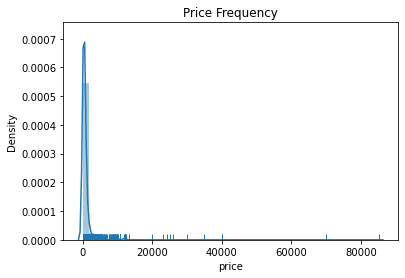

In [52]:
sns.distplot(df['price'], rug = True)
plt.title('Price Frequency')

In [53]:
df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [54]:
df.room_type.value_counts()

Private room       3271
Entire home/apt    2365
Shared room         348
Hotel room          100
Name: room_type, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='room_type'>

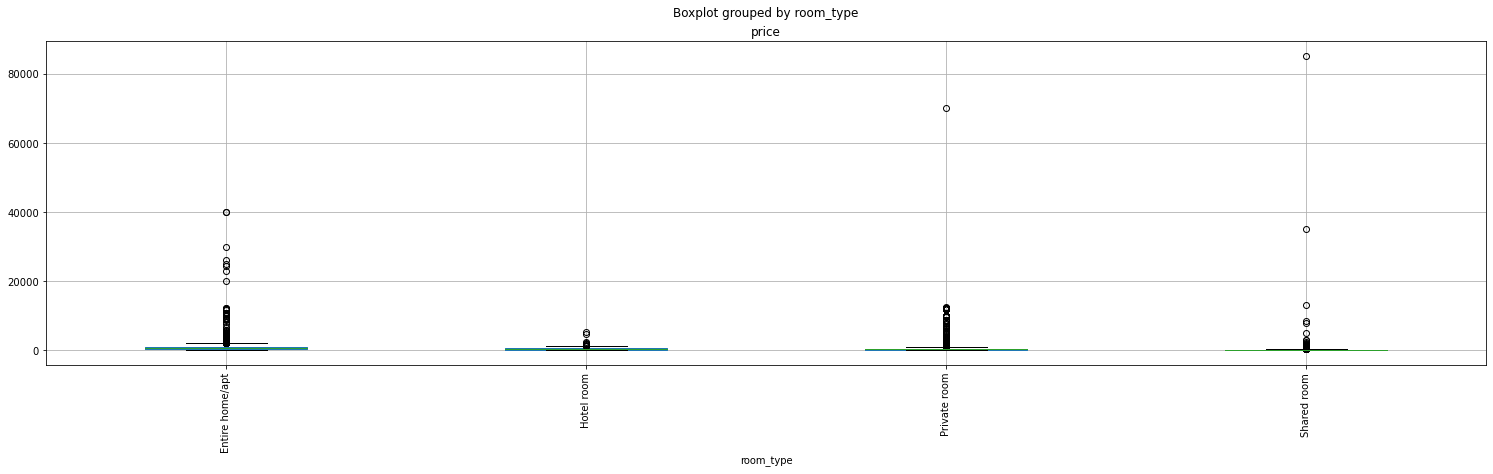

In [55]:
df.boxplot(column='price', by = 'room_type', figsize=(25,6), rot = 90)

Text(0.5, 1.0, 'Longitude & Latitude along with Price')

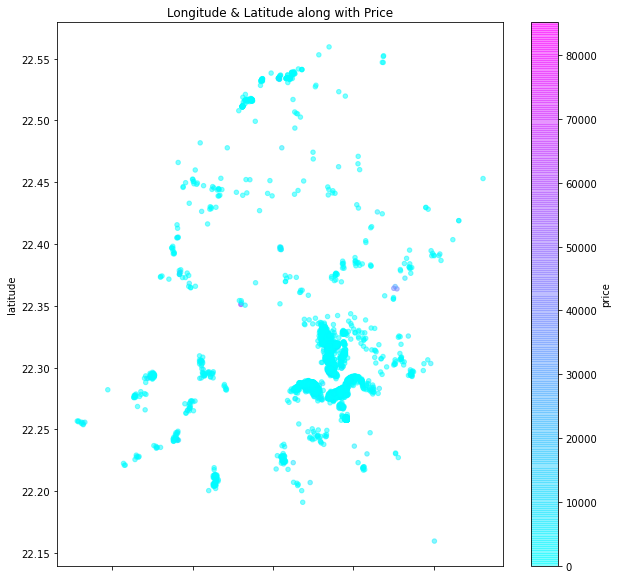

In [56]:
df.plot.scatter(x = 'longitude' , y = 'latitude', c = 'price', figsize=(10,10), cmap='cool', alpha=0.5)
plt.title('Longitude & Latitude along with Price')

Text(0.5, 1.0, 'Longitude and Latitude along with Price < 200')

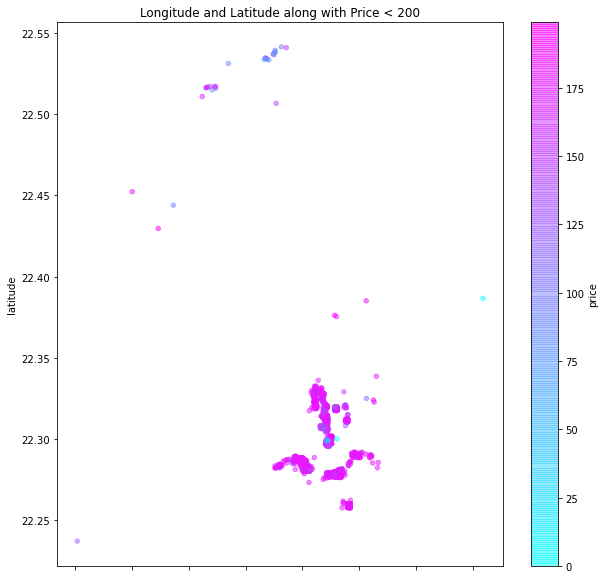

In [57]:
df[df['price']<200].plot.scatter(x = 'longitude' , y = 'latitude', c = 'price', figsize=(10,10), cmap='cool', alpha=0.5)
plt.title('Longitude and Latitude along with Price < 200')

In [58]:
import folium
from folium import plugins
from folium.plugins import HeatMap

China = folium.Map(location=[35.8593, 104.1361], zoom_start = 3)
heat_data = [[row['latitude'],row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(China)
China

Text(0.5, 1.0, 'Price vs Number of Reviews')

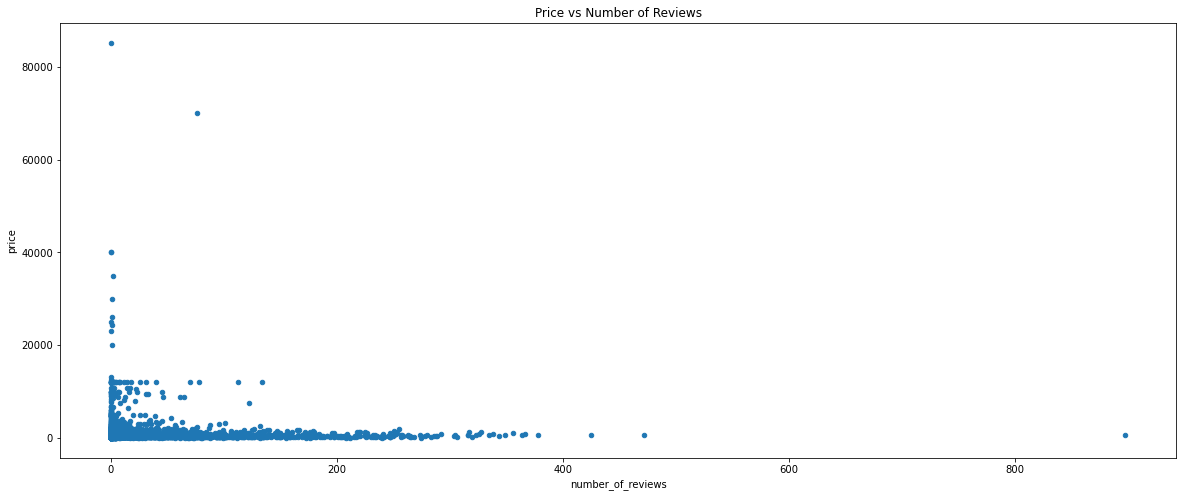

In [59]:
df.plot.scatter(x = 'number_of_reviews', y = 'price', figsize=(20,8))
plt.title('Price vs Number of Reviews')

Text(0.5, 1.0, 'Price vs log(reviews)')

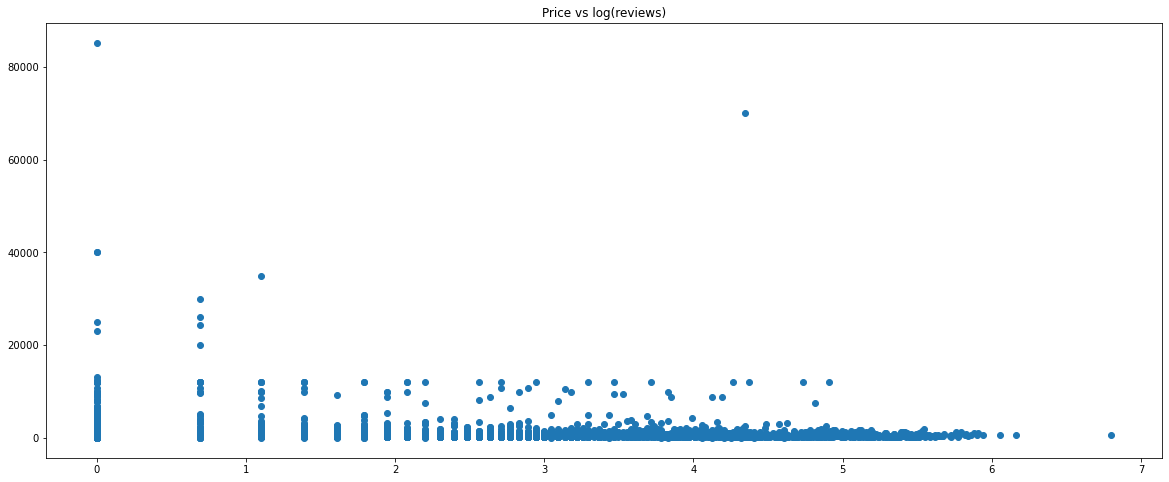

In [60]:
plt.figure(figsize=(20,8))
plt.scatter(np.log(1+df['number_of_reviews']), df['price'])
plt.title('Price vs log(reviews)')

Text(0.5, 1.0, 'Price vs Bedrooms')

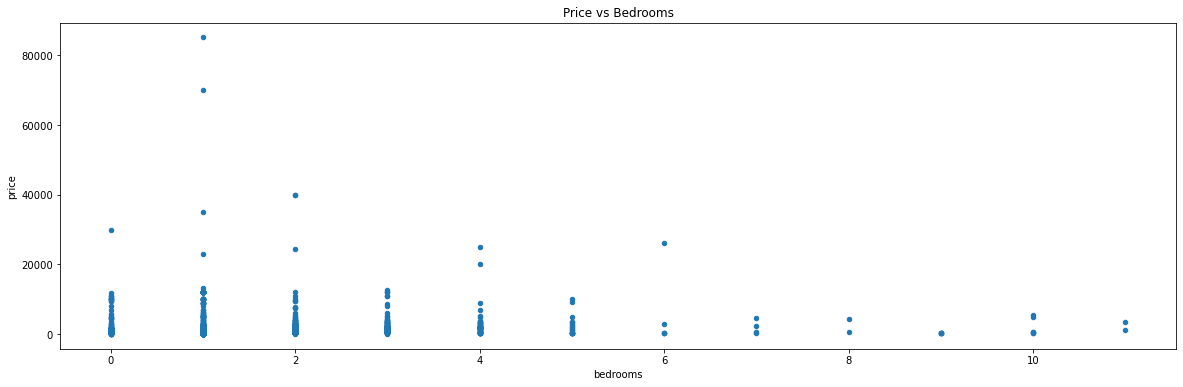

In [61]:
df.plot.scatter(x = 'bedrooms', y = 'price', figsize=(20,6))
plt.title('Price vs Bedrooms') 

Text(0.5, 1.0, 'Price vs Accomodates')

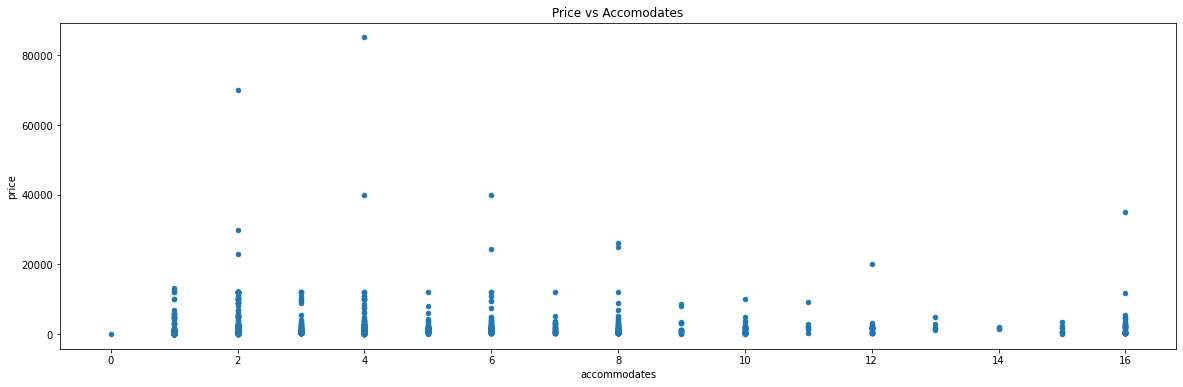

In [62]:
df.plot.scatter(x = 'accommodates', y = 'price', figsize=(20,6))
plt.title('Price vs Accomodates') 

In [63]:
df['logreviews'] = np.log(1 + df['number_of_reviews'])

In [64]:
df.head()

,id,latitude,longitude,room_type,accommodates,bedrooms,price,number_of_reviews,logreviews
0,17891,22.28327,114.14988,Entire home/apt,3,0.0,1400.0,73,4.304065
1,69074,22.28350,114.14854,Entire home/apt,3,1.0,1497.0,135,4.912655
2,103760,22.28418,114.15431,Entire home/apt,6,2.0,614.0,274,5.616771
3,104626,22.28360,114.14790,Entire home/apt,2,1.0,2533.0,14,2.708050
4,132773,22.28921,114.14325,Entire home/apt,6,2.0,847.0,209,5.347108


In [65]:
df.columns

Index(['id', 'latitude', 'longitude', 'room_type', 'accommodates', 'bedrooms',
       'price', 'number_of_reviews', 'logreviews'],
      dtype='object')

Text(0.5, 1.0, 'Correlogram between Features')

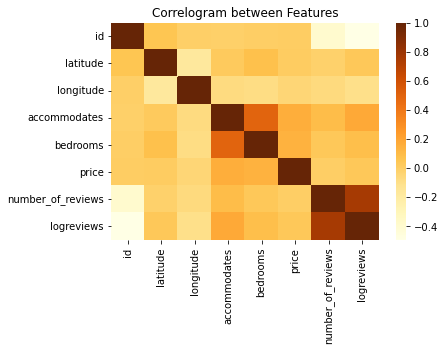

In [66]:
corr1=df.corr()
sns.heatmap(corr1, cmap="YlOrBr")
plt.title('Correlogram between Features')

Text(0.5, 1.0, 'Correlation between Features')

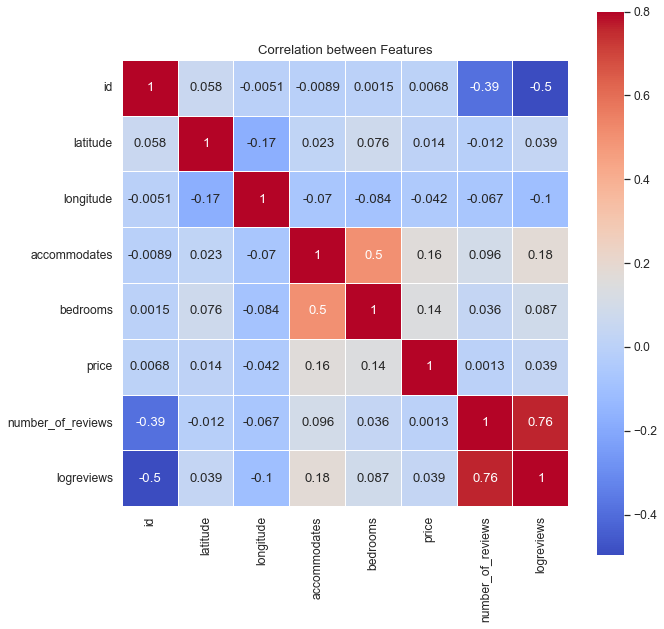

In [67]:
corrMatrix=df[['id', 'latitude', 'longitude', 'room_type', 'accommodates', 'bedrooms', 'price', 'number_of_reviews', 'logreviews']].corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))
sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='coolwarm',linecolor="white")
plt.title('Correlation between Features')

In [68]:
data = df.copy()
print('amount of original data:' + str(len(data)))

amount of original data:6084


In [69]:
data = pd.get_dummies(data)
data.head()

,id,latitude,longitude,accommodates,bedrooms,price,number_of_reviews,logreviews,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,17891,22.28327,114.14988,3,0.0,1400.0,73,4.304065,1,0,0,0
1,69074,22.28350,114.14854,3,1.0,1497.0,135,4.912655,1,0,0,0
2,103760,22.28418,114.15431,6,2.0,614.0,274,5.616771,1,0,0,0
3,104626,22.28360,114.14790,2,1.0,2533.0,14,2.708050,1,0,0,0
4,132773,22.28921,114.14325,6,2.0,847.0,209,5.347108,1,0,0,0


In [70]:
data.columns

Index(['id', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'price',
       'number_of_reviews', 'logreviews', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [71]:
X = data[['id', 'accommodates', 'bedrooms', 'number_of_reviews', 'logreviews', 'room_type_Entire home/apt',
          'room_type_Hotel room', 'room_type_Private room',
          'room_type_Shared room']]
y = data['price']

# Multi-Linear Regression 

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [73]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4867, 9), (1217, 9), (4867,), (1217,))

In [74]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [75]:
print('Intercept: ', regressor.intercept_)
print('Coefficients: ', regressor.coef_)
print(regressor)

Intercept:  257.9653432872773
Coefficients:  [-9.17244193e-07  7.25071595e+01  2.42023144e+02 -2.40426953e+00
  5.65044244e+01  2.73312882e+02 -1.38546203e+02 -5.67769809e+01
 -7.79896981e+01]
LinearRegression()


In [76]:
y_pred = regressor.predict(X_test)

In [77]:
y_pred

array([1541.25769178, 1885.40333577,  939.22437167, ...,  618.42181729,
        583.65067034,  555.60555147])

In [78]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
df1

,Actual,Predicted
1046,1000.0,1541.257692
4058,1650.0,1885.403336
4602,200.0,939.224372
2410,180.0,562.754378
167,464.0,1213.294417
...,...,...
3248,4000.0,1528.346830
1543,660.0,657.683411
1860,290.0,618.421817
1966,140.0,583.650670


In [79]:
#Accuracy of the model.
r2_score(y_test, y_pred)

0.031163180170274973

In [80]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 650.9578189246497
Mean Squared Error: 8147731.387205202
Root Mean Squared Error: 2854.4231268691055


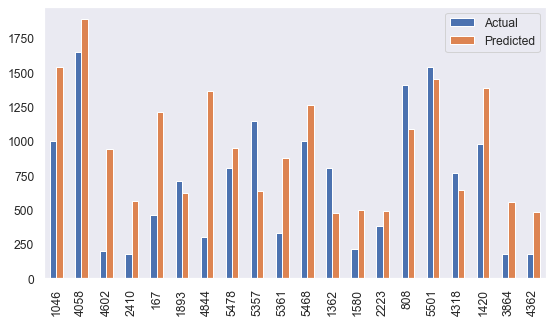

In [81]:
#first20pred
df2 = df1.head(20)
df2.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

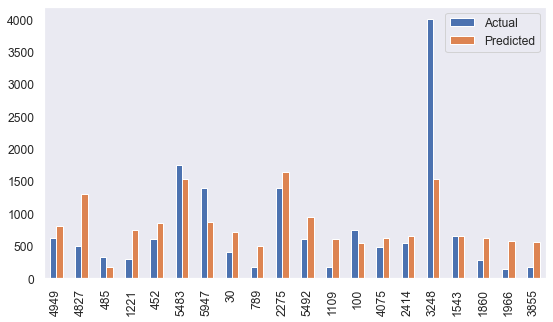

In [82]:
#last20pred
df2 = df1.tail(20)
df2.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# K-Nearest Neighbor Classification

In [83]:
conditions = [
    (data['price'] < 100.0),
    (data['price'] >= 100.0) & (data['price'] < 250.0),
    (data['price'] >= 250.0) & (data['price'] < 600.0),
    (data['price'] >= 600.0) ]

values = ['economic', 'low-mid', 'high-mid','high']

data['price_range'] = np.select(conditions, values)

In [84]:
data['price_range'].value_counts()

high-mid    2253
low-mid     1902
high        1901
economic      28
Name: price_range, dtype: int64

In [85]:
labelencoder = LabelEncoder()
data['price_range_category'] = labelencoder.fit_transform(data['price_range'])

In [86]:
df3 = data[['id', 'accommodates', 'bedrooms', 'price', 'price_range_category',
       'number_of_reviews', 'logreviews', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room']]

In [87]:
df3.corr().style.background_gradient(cmap='magma')

,id,accommodates,bedrooms,price,price_range_category,number_of_reviews,logreviews,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
id,1.000000,-0.008895,0.001484,0.006811,-0.010686,-0.388603,-0.497266,0.154619,-0.064882,-0.134530,-0.000204
accommodates,-0.008895,1.000000,0.501812,0.161799,-0.343598,0.095945,0.181396,0.225412,-0.014896,-0.248789,0.069142
bedrooms,0.001484,0.501812,1.000000,0.141533,-0.231241,0.036130,0.086596,0.068629,-0.010139,-0.059912,-0.009876
price,0.006811,0.161799,0.141533,1.000000,-0.290858,0.001310,0.039306,0.101726,-0.010857,-0.093056,-0.007798
price_range_category,-0.010686,-0.343598,-0.231241,-0.290858,1.000000,-0.122620,-0.248356,-0.494191,-0.043668,0.414101,0.172195
number_of_reviews,-0.388603,0.095945,0.036130,0.001310,-0.122620,1.000000,0.762111,0.061715,0.075265,-0.061607,-0.038484
logreviews,-0.497266,0.181396,0.086596,0.039306,-0.248356,0.762111,1.000000,0.108104,0.104930,-0.112894,-0.041991
room_type_Entire home/apt,0.154619,0.225412,0.068629,0.101726,-0.494191,0.061715,0.108104,1.000000,-0.103088,-0.859920,-0.196421
room_type_Hotel room,-0.064882,-0.014896,-0.010139,-0.010857,-0.043668,0.075265,0.104930,-0.103088,1.000000,-0.139399,-0.031841
room_type_Private room,-0.134530,-0.248789,-0.059912,-0.093056,0.414101,-0.061607,-0.112894,-0.859920,-0.139399,1.000000,-0.265608


In [88]:
neigh = KNeighborsClassifier(n_neighbors=3)

X1 = df3.iloc[:, :-1].values
y1 = df3['price_range_category'].values

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.20, random_state=42) 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [89]:
y_pred1 = neigh.predict(X_test)

In [90]:
KNNmod = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred1.flatten()})
KNNmod

,Actual,Predicted
0,1,1
1,1,1
2,3,3
3,3,3
4,2,2
...,...,...
1212,1,1
1213,1,1
1214,2,2
1215,3,3


In [91]:
#Accuracy of the model.
print(neigh.score(X_test, y_test)) 

0.990139687756779


In [92]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred1))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 0.009860312243221035
Mean Squared Error: 0.009860312243221035
Root Mean Squared Error: 0.09929910494672665


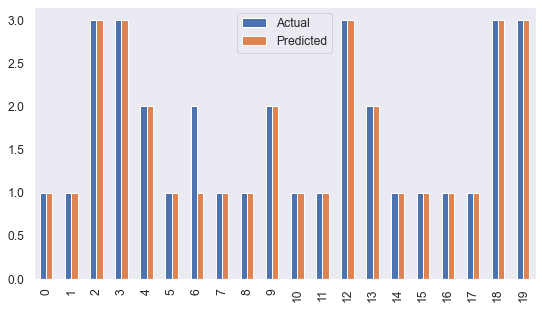

In [93]:
#first20pred
df4 = KNNmod.head(20)
df4.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

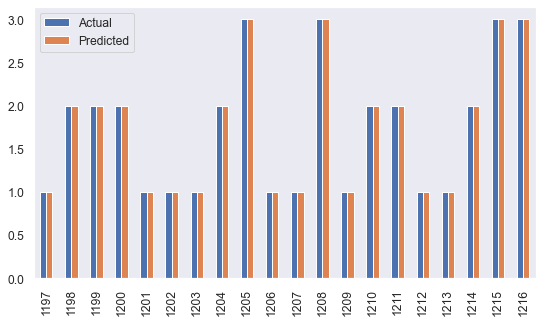

In [94]:
#last20pred
df4 = KNNmod.tail(20)
df4.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [95]:
print(classification_report(y_test, y_pred1, target_names=['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.99      0.99      0.99       419
           2       0.99      0.98      0.99       422
           3       0.99      1.00      1.00       374

    accuracy                           0.99      1217
   macro avg       0.99      0.87      0.91      1217
weighted avg       0.99      0.99      0.99      1217



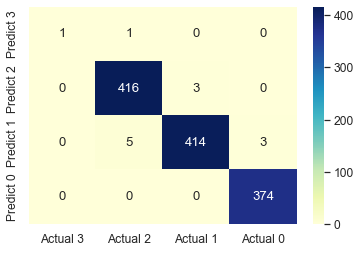

In [96]:
cm = confusion_matrix(y_test, y_pred1)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual 3', 'Actual 2', 'Actual 1', 'Actual 0'], 
                        index=['Predict 3', 'Predict 2', 'Predict 1', 'Predict 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [97]:
y_pred1 = neigh.predict(X_test)

In [98]:
len(y_pred1)

1217

In [99]:
y_pred1

array([1, 1, 3, ..., 2, 3, 3])

In [100]:
y_prob_pred = neigh.predict_proba(X_test)

In [101]:
len(y_prob_pred)

1217

In [102]:
y_prob_pred

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [103]:
#AUC ROC Score.
roc_auc_score(y_test, y_prob_pred, multi_class='ovo', average='weighted')

0.9411188725534729

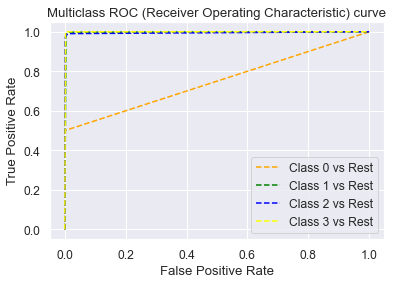

In [104]:
#AUC ROC Curve.
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred[:,i], pos_label=i)
    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC (Receiver Operating Characteristic) curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300) 

Text(0.5, 1.0, 'Outliers')

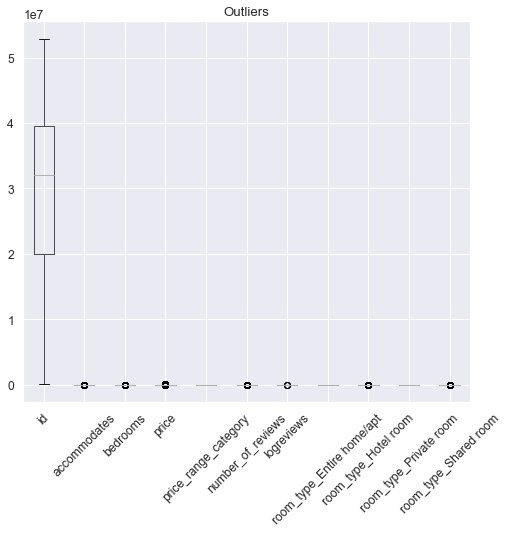

In [105]:
boxplot1 = df3.boxplot(figsize=(8,7),rot=45)
plt.title('Outliers')

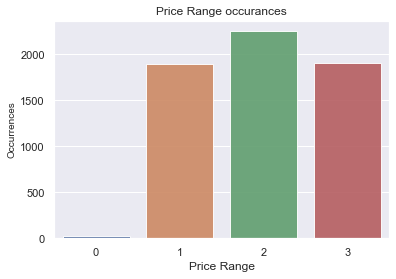

In [106]:
prange_count = df3['price_range_category'].value_counts()
sns.set(style="darkgrid")
sns.barplot(prange_count.index, prange_count.values, alpha=0.9)
plt.title('Price Range occurances')
plt.ylabel('Occurrences', fontsize=10)
plt.xlabel('Price Range', fontsize=12)
plt.show()

#  Naive Bayes Classification

In [107]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, GridSearchCV 
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred2_train = gnb.predict(X_train)
y_pred2_test = gnb.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,gnb.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,gnb.predict(X_test)),4)))

Training Accuracy score: 1.0
Testing Accuracy score: 1.0


In [108]:
df5 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2_test.flatten()})
df5

,Actual,Predicted
0,1,1
1,1,1
2,3,3
3,3,3
4,2,2
...,...,...
1212,1,1
1213,1,1
1214,2,2
1215,3,3


In [109]:
#Accuracy of the model.
accuracy_score(y_test, y_pred2_test)

1.0

In [110]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred2_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred2_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred2_test)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


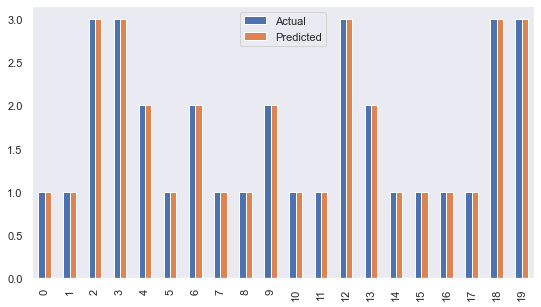

In [111]:
#first20pred
df6 = df5.head(20)
df6.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

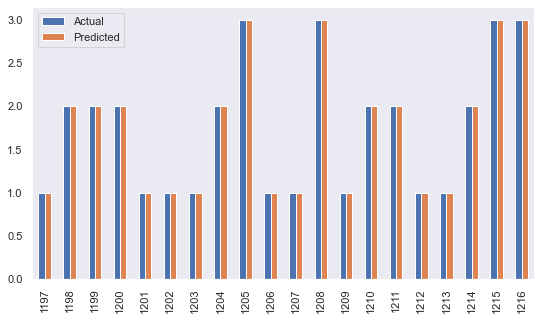

In [112]:
#last20pred
df6 = df5.tail(20)
df6.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [113]:
print(classification_report(y_test, y_pred2_test, target_names=['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00       419
           2       1.00      1.00      1.00       422
           3       1.00      1.00      1.00       374

    accuracy                           1.00      1217
   macro avg       1.00      1.00      1.00      1217
weighted avg       1.00      1.00      1.00      1217



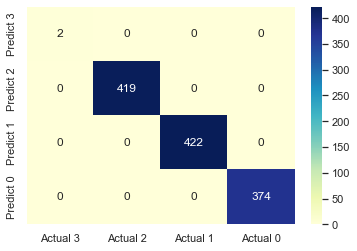

In [114]:
cm = confusion_matrix(y_test, y_pred2_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual 3', 'Actual 2', 'Actual 1', 'Actual 0'], 
                        index=['Predict 3', 'Predict 2', 'Predict 1', 'Predict 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [115]:
y_pred2_test = gnb.predict(X_test)

In [116]:
len(y_pred2_test)

1217

In [117]:
y_pred2_test

array([1, 1, 3, ..., 2, 3, 3])

In [118]:
y_prob_pred1 = gnb.predict_proba(X_test)

In [119]:
y_prob_pred1

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [120]:
len(y_prob_pred1)

1217

In [121]:
a = np.array(y_prob_pred1)
b = np.zeros_like(a)
b[np.arange(len(a)), a.argmax(1)] = 1
b

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [122]:
#AUC ROC Score.
roc_auc_score(y_pred2_test, b, multi_class='ovo', average='weighted')

1.0

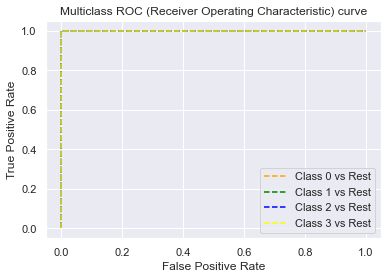

In [123]:
#AUC ROC Curve.
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_pred2_test, y_prob_pred1[:,i], pos_label=i)
    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC (Receiver Operating Characteristic) curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300) 

# Random Forest Classification

In [124]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.20, random_state=42) 
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred3_train = clf.predict(X_train)
y_pred3_test = clf.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,clf.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,clf.predict(X_test)),4)))

Training Accuracy score: 1.0
Testing Accuracy score: 1.0


In [125]:
df7 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3_test.flatten()})
df7

,Actual,Predicted
0,1,1
1,1,1
2,3,3
3,3,3
4,2,2
...,...,...
1212,1,1
1213,1,1
1214,2,2
1215,3,3


In [126]:
#Accuracy of the model.
accuracy_score(y_test, y_pred3_test)

1.0

In [127]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred3_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred3_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred3_test)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


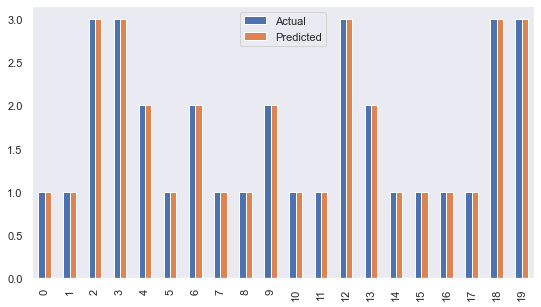

In [128]:
#first20pred
df8 = df7.head(20)
df8.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

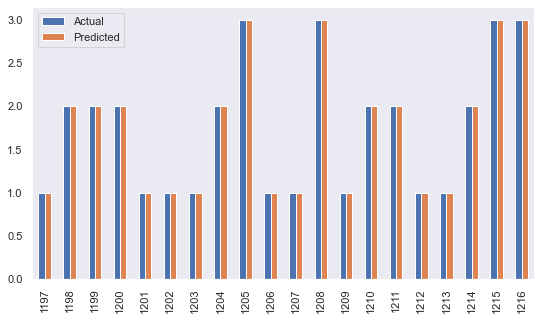

In [129]:
#last20pred
df8 = df7.tail(20)
df8.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [130]:
print(classification_report(y_test, y_pred3_test, target_names=['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00       419
           2       1.00      1.00      1.00       422
           3       1.00      1.00      1.00       374

    accuracy                           1.00      1217
   macro avg       1.00      1.00      1.00      1217
weighted avg       1.00      1.00      1.00      1217



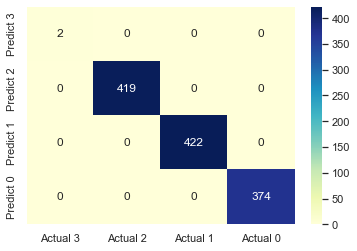

In [131]:
cm = confusion_matrix(y_test, y_pred3_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual 3', 'Actual 2', 'Actual 1', 'Actual 0'], 
                        index=['Predict 3', 'Predict 2', 'Predict 1', 'Predict 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [132]:
y_pred3_test = clf.predict(X_test)

In [133]:
#AUC ROC Score.
y_prob_pred2 = clf.predict_proba(X_test)
roc_auc_score(y_pred3_test, y_prob_pred2, multi_class='ovo', average='weighted')

1.0

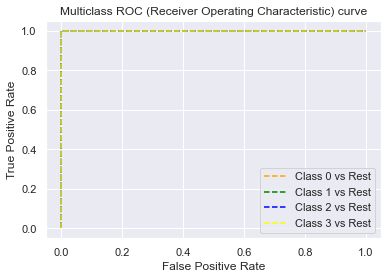

In [134]:
#AUC ROC Curve.
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_pred3_test, y_prob_pred2[:,i], pos_label=i)
    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC (Receiver Operating Characteristic) curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300) 

# Decision Tree Classification

In [135]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV 
from sklearn.tree import DecisionTreeClassifier
X2 = data[['id', 'accommodates', 'bedrooms', 'number_of_reviews', 'logreviews', 'room_type_Entire home/apt',
          'room_type_Hotel room', 'room_type_Private room',
          'room_type_Shared room']]
y2 = data['price_range_category']
X_train,X_test,y_train,y_test=train_test_split(X2, y2, test_size=0.20, random_state=42)

In [136]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train,y_train)
y_pred4 = dt.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,dt.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,dt.predict(X_test)),4)))

Training Accuracy score: 0.9998
Testing Accuracy score: 0.668


In [137]:
Treedata=data[['id', 'accommodates', 'bedrooms', 'price', 'price_range_category',
       'number_of_reviews', 'logreviews', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room']]

In [138]:
from sklearn import tree
from sklearn.tree import plot_tree

feature_cols = ['id', 'accommodates', 'bedrooms',
       'number_of_reviews', 'logreviews', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room']
X3 = Treedata[feature_cols].values # Features
y3 = Treedata.price_range_category.values # Target variable

In [139]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.20,random_state = 42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [140]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_scaled,y_train)
y_pred5 = clf.predict(X_test)

In [141]:
print("Accuracy:", accuracy_score(y_test, y_pred5))

Accuracy: 0.36154478225143794


In [142]:
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred5))

Root Mean Squared Error: 0.7962202136400987


In [143]:
Treecls = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred5.flatten()})
Treecls

,Actual,Predicted
0,1,2
1,1,2
2,3,2
3,3,2
4,2,2
...,...,...
1212,1,2
1213,1,2
1214,2,1
1215,3,3


In [144]:
#Accuracy of the model.
accuracy_score(y_test, y_pred5)

0.36154478225143794

In [145]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred5))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred5))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred5)))

Mean Absolute Error: 0.6910435497124076
Mean Squared Error: 0.7962202136400987
Root Mean Squared Error: 0.8923117244775497


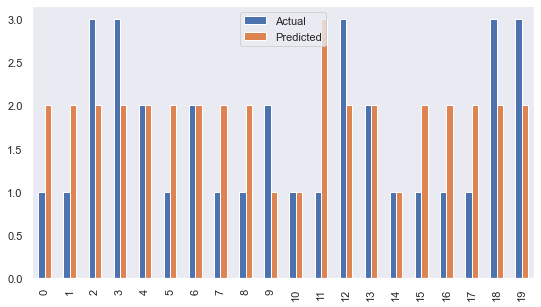

In [146]:
#first20pred
df9 = Treecls.head(20)
df9.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

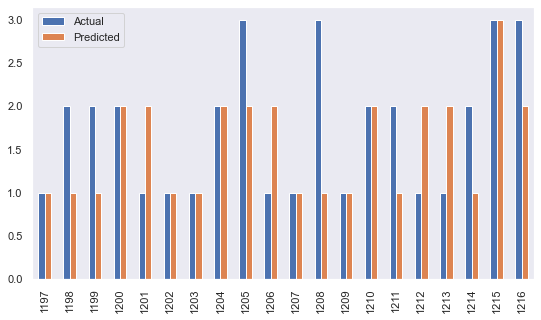

In [147]:
#last20pred
df9 = Treecls.tail(20)
df9.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [148]:
print(classification_report(y_test, y_pred5, target_names=['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.40      0.39      0.40       419
           2       0.30      0.53      0.38       422
           3       0.71      0.15      0.24       374

    accuracy                           0.36      1217
   macro avg       0.35      0.27      0.26      1217
weighted avg       0.46      0.36      0.34      1217



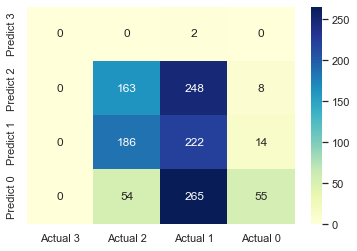

In [149]:
cm = confusion_matrix(y_test, y_pred5)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual 3', 'Actual 2', 'Actual 1', 'Actual 0'], 
                        index=['Predict 3', 'Predict 2', 'Predict 1', 'Predict 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [150]:
y_pred5 = dt.predict(X_test)

In [151]:
#AUC ROC Score.
y_prob_pred3 = dt.predict_proba(X_test)
roc_auc_score(y_pred5, y_prob_pred3, multi_class='ovo', average='weighted')

1.0

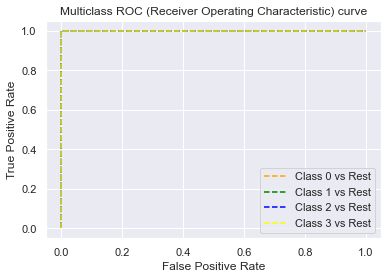

In [152]:
#AUC ROC Curve.
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_pred5, y_prob_pred3[:,i], pos_label=i)
    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC (Receiver Operating Characteristic) curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300) 

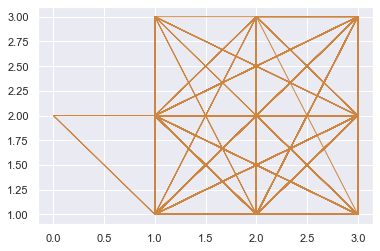

In [153]:
a=Treecls.Actual
b=Treecls.Predicted
plt.plot(a, b, color='peru', linewidth=1)
plt.show()

# Ensembling (Voting Classification)

In [154]:
from sklearn.ensemble import VotingClassifier

classifiers = [('KNN', neigh), ('Random Forest', clf), ('Decision Tree', dt), ('Naive Bayes', gnb)]
vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)

print("Training Accuracy score: "+str(round(accuracy_score(y_train,vc.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,vc.predict(X_test)),4)))

Training Accuracy score: 0.9554
Testing Accuracy score: 0.6475


In [155]:
y_pred6 = vc.predict(X_test)

In [156]:
df10 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred6.flatten()})
df10

,Actual,Predicted
0,1,1
1,1,1
2,3,1
3,3,3
4,2,1
...,...,...
1212,1,1
1213,1,2
1214,2,2
1215,3,2


In [157]:
#Accuracy of the model.
accuracy_score(y_test, y_pred6)

0.647493837304848

In [158]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred6))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred6))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred6)))

Mean Absolute Error: 0.4149548069022186
Mean Squared Error: 0.5447822514379622
Root Mean Squared Error: 0.7380936603426168


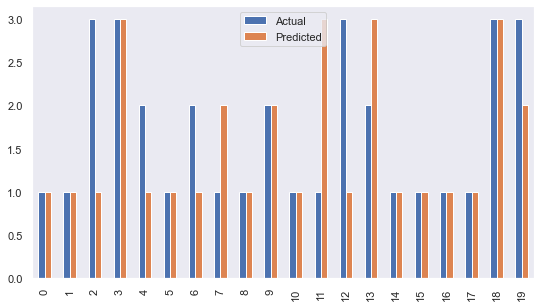

In [159]:
#first20pred
df11 = df10.head(20)
df11.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

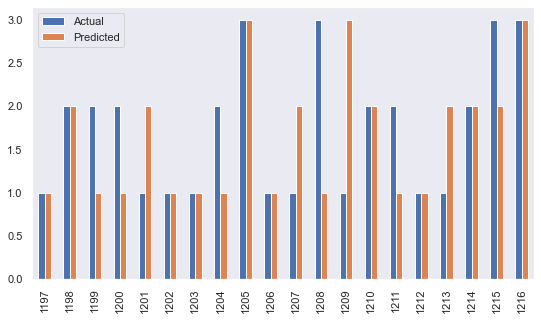

In [160]:
#last20pred
df11 = df10.tail(20)
df11.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [161]:
print(classification_report(y_test, y_pred6, target_names=['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.65      0.65      0.65       419
           2       0.57      0.62      0.59       422
           3       0.76      0.67      0.71       374

    accuracy                           0.65      1217
   macro avg       0.50      0.49      0.49      1217
weighted avg       0.66      0.65      0.65      1217



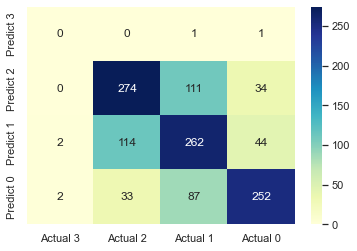

In [162]:
cm = confusion_matrix(y_test, y_pred6)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual 3', 'Actual 2', 'Actual 1', 'Actual 0'], 
                        index=['Predict 3', 'Predict 2', 'Predict 1', 'Predict 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [163]:
#AUC ROC Score.
y_prob_pred3 = dt.predict_proba(X_test)
roc_auc_score(y_pred6, y_prob_pred3, multi_class='ovo', average='weighted')

0.9439897029729528

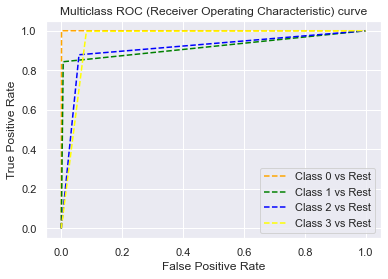

In [164]:
#AUC ROC Curve.
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_pred6, y_prob_pred3[:,i], pos_label=i)
    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC (Receiver Operating Characteristic) curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300) 